In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 
import pandas as pd
import glob
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.optimizers import RMSprop
import imghdr
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization

/var/folders/fv/y6x7n7ls3g901b1zd6v7_g480000gn/T/ipykernel_56445/4229287962.py:12: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
data_dir = '/Users/zahidlaguna/Desktop/TrainingData'
img_ext = ['jpeg','jpg', 'bmp', 'png']
os.listdir(data_dir)

['Testing', 'Validation']

In [3]:
for image_name in os.listdir(data_dir):
    if os.path.isfile(os.path.join(data_dir, image_name)) and imghdr.what(os.path.join(data_dir, image_name)) not in img_ext:
        print(image_name)
        os.remove(os.path.join(data_dir, image_name))

In [4]:
base_dir = '/Users/zahidlaguna/Desktop/TrainingData/Testing/'

Lebron = glob.glob(os.path.join(base_dir, 'Lebron', '*.jpg'))
nba = glob.glob(os.path.join(base_dir, 'NBA', '*.jpg'))

print(f"There are {len(Lebron)} Lebron images")
print(f"There are {len(nba)} NBA images")

There are 24 Lebron images
There are 26 NBA images


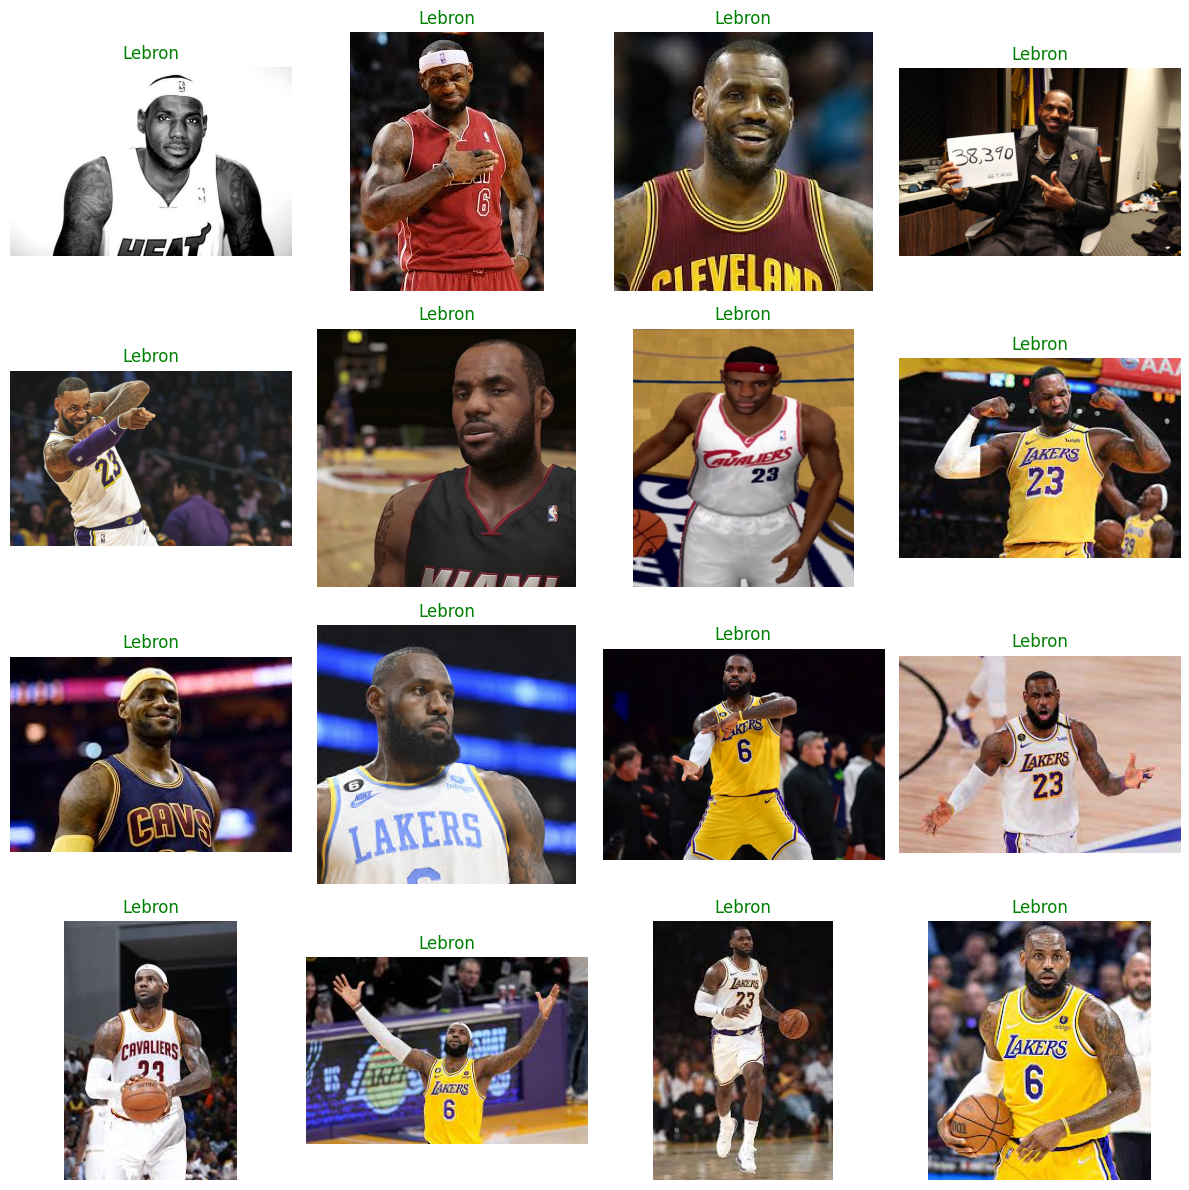

In [5]:
def display_images(paths, rows=4, cols=4, cat = 'None'):
    fig, ax = plt.subplots(rows, cols, figsize=(12,12))
    ax = ax.flatten()
    if cat == 'Lebron':
        c = 'green'
    else:
        c = 'red'
    for i, img in enumerate(paths):
        img = cv2.imread(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i].imshow(img)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title(cat, color = c)
        ax[i].axis('off')
        ax[i].grid(False)
    plt.tight_layout()
    plt.show()        

path = np.random.choice(Lebron)
display_images(Lebron[:16], rows=4, cols=4, cat='Lebron')


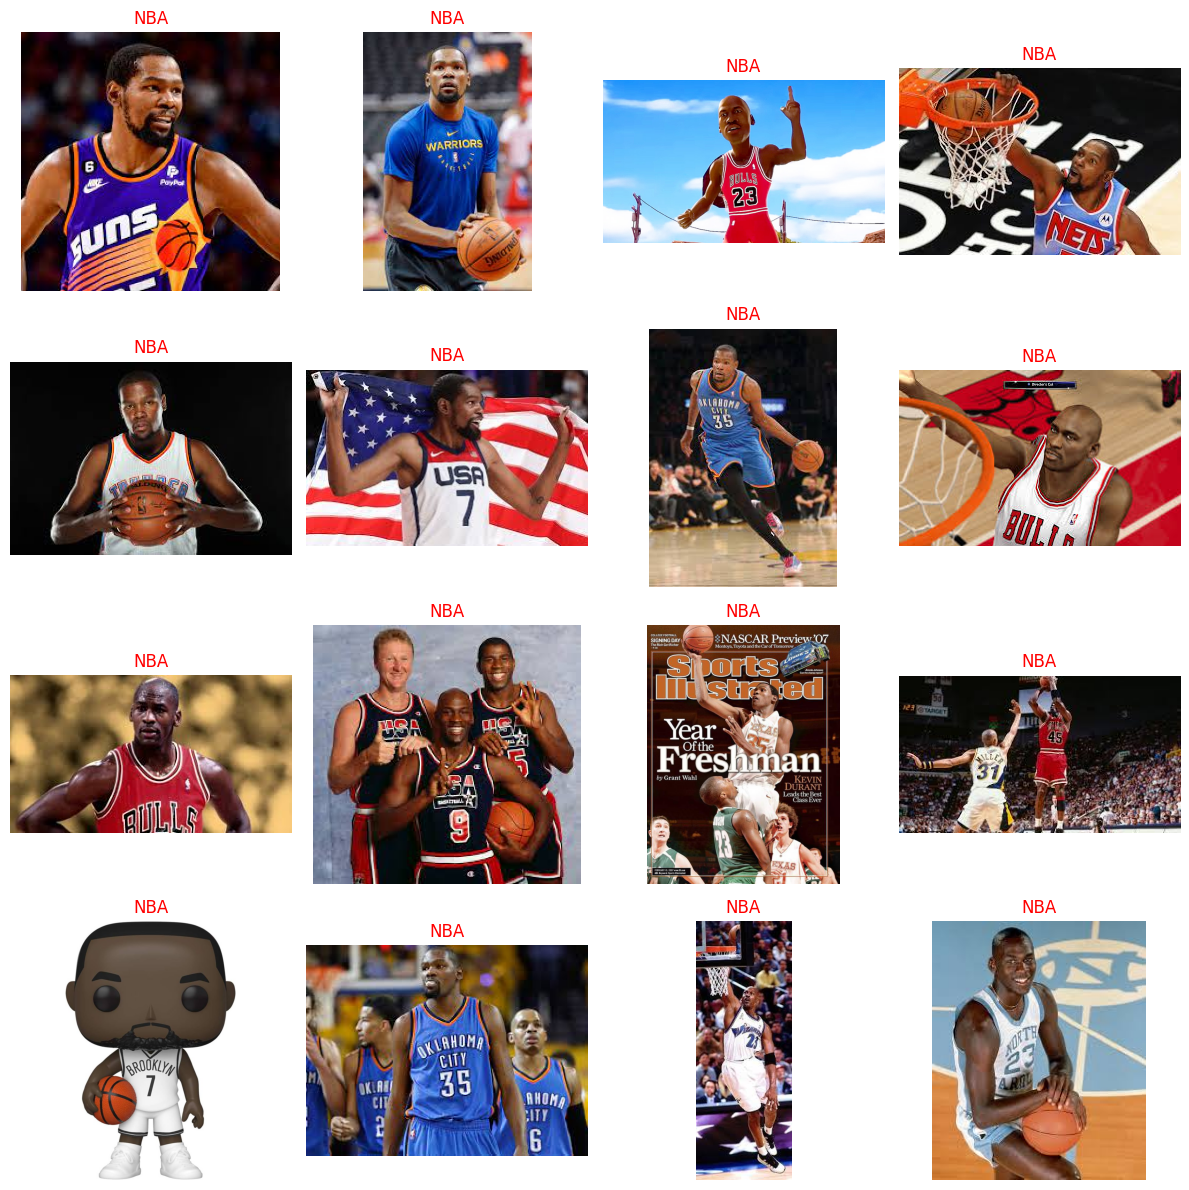

In [6]:
image = np.random.choice(nba)
display_images(nba[:16], rows=4, cols=4, cat='NBA')

In [7]:
df = pd.DataFrame(columns= ['image', 'label', 'target'])
df['image'] = Lebron + nba
df['label'] = ['Lebron']*len(Lebron) + ['NBA']*len(nba)
df['target'] = [1]*len(Lebron) + [0]*len(nba)
df = df.sample(frac=1).reset_index(drop=True)
df.head(11)

image   label  target
0   /Users/zahidlaguna/Desktop/TrainingData/Testin...     NBA       0
1   /Users/zahidlaguna/Desktop/TrainingData/Testin...     NBA       0
2   /Users/zahidlaguna/Desktop/TrainingData/Testin...  Lebron       1
3   /Users/zahidlaguna/Desktop/TrainingData/Testin...     NBA       0
4   /Users/zahidlaguna/Desktop/TrainingData/Testin...  Lebron       1
5   /Users/zahidlaguna/Desktop/TrainingData/Testin...     NBA       0
6   /Users/zahidlaguna/Desktop/TrainingData/Testin...     NBA       0
7   /Users/zahidlaguna/Desktop/TrainingData/Testin...  Lebron       1
8   /Users/zahidlaguna/Desktop/TrainingData/Testin...     NBA       0
9   /Users/zahidlaguna/Desktop/TrainingData/Testin...  Lebron       1
10  /Users/zahidlaguna/Desktop/TrainingData/Testin...  Lebron       1

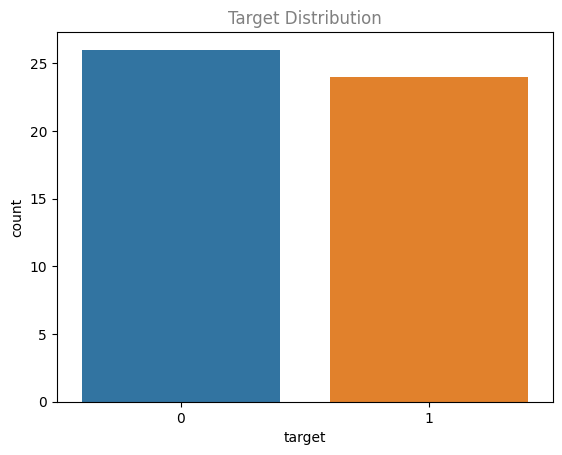

In [8]:
plt.title('Target Distribution', color = 'grey')
sns.countplot(data = df, x = 'target');

In [9]:
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 42)
print(f"Training Data: {len(train_df)}")
print(f"Testing Data: {len(test_df)}")

Training Data: 40
Testing Data: 10


In [10]:
generator = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)
training_generator = generator.flow_from_dataframe(dataframe = train_df,
                                                    directory = data_dir,
                                                    x_col = 'image',
                                                    y_col = 'label',
                                                    subset = 'training',
                                                    batch_size = 32,
                                                    shuffle = True,
                                                    target_size = (150, 150))

Found 32 validated image filenames belonging to 2 classes.


In [11]:
print(training_generator.classes[0:30])

[1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0]


In [12]:
print(training_generator.split)

(0.2, 1)


In [13]:
testing_generator = generator.flow_from_dataframe(dataframe = test_df,
                                                    directory = data_dir,
                                                    x_col = 'image',
                                                    y_col = 'label',
                                                    subset = 'validation',
                                                    batch_size = 32,
                                                    shuffle = True,
                                                    target_size = (150, 150))

Found 2 validated image filenames belonging to 2 classes.


In [14]:
print(testing_generator.classes[0:30])

[1, 1]


In [15]:
print(testing_generator.split)

(0, 0.2)


In [16]:
Validation_generator = generator.flow_from_dataframe(dataframe = test_df,
                                                    directory = data_dir,
                                                    x_col = 'image',
                                                    y_col = 'label',
                                                    subset = 'validation',
                                                    batch_size = 32,
                                                    shuffle = True,
                                                    target_size = (150, 150))

Found 2 validated image filenames belonging to 2 classes.


In [17]:
print(Validation_generator.classes[0:30])

[1, 1]


In [18]:
print(Validation_generator.split)

(0, 0.2)


In [19]:
model = tf.keras.models.Sequential([
  
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Flatten(input_shape=(113,)),
  
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  
  tf.keras.layers.Dense(2,activation="softmax")
])

In [20]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3, restore_best_weights = True)

In [22]:
CNN_model = model.fit(training_generator, validation_data = testing_generator, epochs = 10, batch_size= 5,callbacks = [callbacks])

Epoch 1/10
1/1 [==============================] - 0s 430ms/step - loss: 0.6933 - accuracy: 0.4375 - val_loss: 0.6739 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 89ms/step - loss: 0.6874 - accuracy: 0.6562 - val_loss: 0.6028 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 88ms/step - loss: 0.6849 - accuracy: 0.5000 - val_loss: 0.5566 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 88ms/step - loss: 0.6714 - accuracy: 0.5312 - val_loss: 0.5384 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 93ms/step - loss: 0.6606 - accuracy: 0.6562 - val_loss: 0.5172 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 89ms/step - loss: 0.6555 - accuracy: 0.5938 - val_loss: 0.4901 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 88ms/step - loss: 0.6343 - accuracy: 0.7500 - val_loss: 0.4673 - val_accuracy: 1.0000
Epoch 8/10
1/1 [==========

In [23]:
model_results = model.evaluate(testing_generator, verbose=False)
print(f"Loss: {model_results[0]}, Accuracy: {model_results[1]}")

Loss: 0.4080020785331726, Accuracy: 1.0


In [24]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, None, None, None   0         
                             )                                   
                                                                 
 flatten (Flatten)           (None, None)              0         
                                                                 
 dense (Dense)               (None, 128)               8640128   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

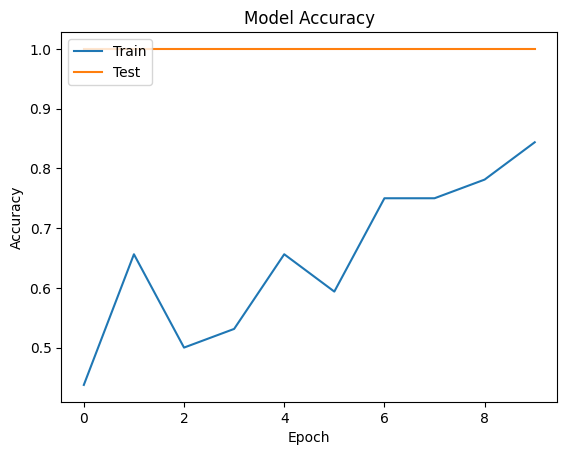

In [25]:
plt.plot(CNN_model.history['accuracy'])
plt.plot(CNN_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

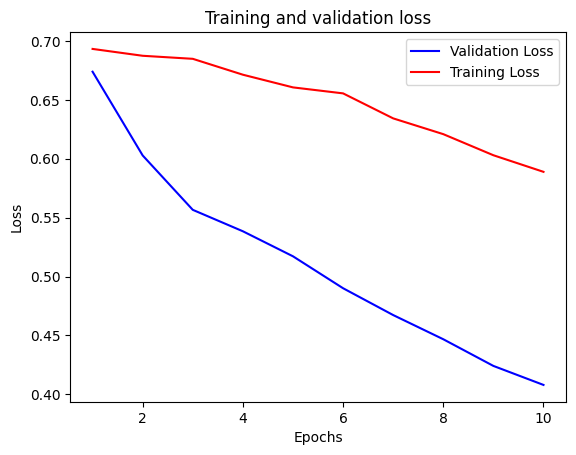

In [26]:
History = CNN_model.history
validation_losses = History['val_loss']
training_losses = History['loss']
epochs = range(1, len(validation_losses) + 1)
plt.plot(epochs, validation_losses, 'b')
plt.plot(epochs, training_losses, 'r')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Validation Loss', 'Training Loss'])
plt.show()

In [27]:
model_predictions = model.predict(testing_generator)
model_predictions = np.argmax(model_predictions, axis = 1)

1/1 [==============================] - 0s 64ms/step


In [28]:
predict_labels = (testing_generator.class_indices)
predict_labels = dict((v,k) for k,v in predict_labels.items())

In [29]:
predict_labels = {0: 'NBA', 1: 'Lebron'}
model_predictions = [predict_labels[k] for k in model_predictions]
print(model_predictions[0:10])

['Lebron', 'Lebron']


In [30]:
test_results = test_df['label'].tolist()

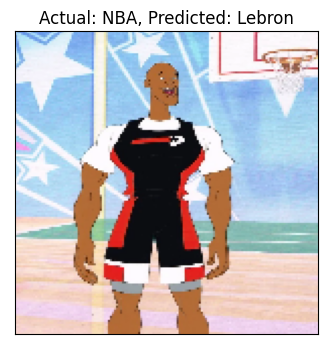

In [31]:
plt.figure(figsize=(10, 10))
num_samples = len(testing_generator)
for i in range(min(9, num_samples)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(testing_generator[i][0][0])
    plt.title(f"Actual: {test_results[i]}, Predicted: {model_predictions[i]}")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()